Employee satisfaction surveys to see if any trends exist. Want to know if reason for resignations were due to dissatisfication with position.

In [639]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [640]:
# Two surveys of interest
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [641]:
print(dete_survey.info(), dete_survey.head())
print(dete_survey.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [642]:
print(tafe_survey.info(), tafe_survey.head())
print(tafe_survey.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [643]:
# Re-read in file but set 'Not Stated' to na for cleaning purposes
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [644]:
# Drop unnecessary columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [645]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace('/',' ').str.replace(' ','_').str.strip().str.lower()

In [646]:
tafe_survey_updated = tafe_survey_updated.rename(columns={'Record ID': 'id','CESSATION YEAR': 'cease_date',
                           'Reason for ceasing employment': 'separationtype',
                           'Gender. What is your Gender?': 'gender',
                           'CurrentAge. Current Age': 'age',
                           'Employment Type. Employment Type': 'employment_status',
                           'Classification. Classification': 'position',
                           'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                           'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'})

In [647]:
dete_uniques = dete_survey_updated['separationtype'].unique()
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].notnull()]
                                          
                                          

In [648]:
tafe_uniques = tafe_survey_updated['separationtype'].unique()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'].notnull()]

In [649]:
# Ensure dates are correct and make sense
dete_start_dates = dete_survey_updated['dete_start_date']
dete_cease_dates = dete_survey_updated['cease_date']
tafe_cease_dates = tafe_survey_updated['cease_date']

In [650]:
dete_start_dates.value_counts(ascending=False)

2011.0    40
2007.0    34
2008.0    31
2010.0    27
2012.0    27
2009.0    24
2006.0    23
2013.0    21
1970.0    21
1975.0    21
1990.0    20
2005.0    20
1999.0    19
1996.0    19
1992.0    18
2004.0    18
1991.0    18
2000.0    18
1989.0    17
1976.0    15
1988.0    15
2002.0    15
2003.0    15
1978.0    15
1995.0    14
1979.0    14
1974.0    14
1980.0    14
1998.0    14
1997.0    14
1993.0    13
1986.0    12
1972.0    12
1977.0    11
1971.0    10
1994.0    10
1969.0    10
2001.0    10
1984.0    10
1981.0     9
1983.0     9
1973.0     8
1985.0     8
1987.0     7
1982.0     4
1963.0     4
1968.0     3
1967.0     2
1965.0     1
1966.0     1
Name: dete_start_date, dtype: int64

In [651]:
dete_start_dates.astype(float)

0      1984.0
1         NaN
2      2011.0
3      2005.0
4      1970.0
5      1994.0
6      1972.0
7      1988.0
8      2009.0
9      1997.0
10     1999.0
11     2009.0
12     1998.0
13     1967.0
14     2007.0
15     1995.0
16        NaN
17     1996.0
18     2006.0
19     1989.0
20     1982.0
21     1980.0
22     1997.0
23     1973.0
24     1981.0
25     1995.0
26     1974.0
27     2005.0
28     1989.0
29     1975.0
        ...  
792    1996.0
793    2003.0
794       NaN
795    1977.0
796    1970.0
797    2000.0
798    1995.0
799    1981.0
800    2011.0
801    1972.0
802       NaN
803    2004.0
804    2008.0
805    1990.0
806    2005.0
807    2004.0
808    2010.0
809    1979.0
810    1972.0
811    2008.0
812    1998.0
813    1995.0
814       NaN
815    2012.0
816    2012.0
817    1977.0
818    1980.0
819    2009.0
820    2001.0
821       NaN
Name: dete_start_date, Length: 822, dtype: float64

In [652]:
dete_cease_dates.value_counts(ascending=False)

2012       344
2013       200
01/2014     43
12/2013     40
09/2013     34
06/2013     27
07/2013     22
10/2013     20
11/2013     16
08/2013     12
05/2013      7
05/2012      6
07/2014      2
04/2014      2
04/2013      2
08/2012      2
02/2014      2
2010         1
09/2010      1
2014         1
11/2012      1
07/2006      1
09/2014      1
07/2012      1
Name: cease_date, dtype: int64

In [653]:
tafe_cease_dates.value_counts(ascending=False)

2011.0    268
2012.0    235
2010.0    103
2013.0     85
2009.0      4
Name: cease_date, dtype: int64

In [654]:
tafe_cease_dates.astype(float)

0      2010.0
1      2010.0
2      2010.0
3      2010.0
4      2010.0
5      2010.0
6      2010.0
7      2010.0
8      2009.0
9      2010.0
10     2010.0
11     2010.0
12     2010.0
13     2010.0
14     2010.0
15     2010.0
16     2010.0
17     2010.0
18     2010.0
19     2010.0
20     2010.0
21     2010.0
22     2010.0
23     2010.0
24     2010.0
25     2010.0
26     2010.0
27     2010.0
28     2010.0
29     2010.0
        ...  
672    2013.0
673    2013.0
674    2013.0
675    2013.0
676    2013.0
677    2013.0
678    2013.0
679    2013.0
680    2013.0
681    2013.0
682    2013.0
683    2013.0
684    2013.0
685    2013.0
686    2013.0
687    2013.0
688    2013.0
689    2013.0
690    2013.0
691    2013.0
692    2013.0
693    2013.0
694    2013.0
695    2013.0
696    2013.0
697    2013.0
698    2013.0
699    2013.0
700    2013.0
701    2013.0
Name: cease_date, Length: 702, dtype: float64

In [655]:
dete_cease_dates = dete_cease_dates.str[-4:].astype(float)

In [656]:
dete_cease_dates.value_counts()

2013.0    380
2012.0    354
2014.0     51
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [657]:
# tafe_survey contains years of services as 'institute_service'
# Creating new column to match tafe years of service
dete_resignations['institute_service'] = dete_cease_dates - dete_start_dates

In [658]:
tafe_resignations

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4
9,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,Other,-,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2


In [659]:
# Examine reason for resignation
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         371
Contributing Factors. Dissatisfaction      66
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [660]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      360
Job Dissatisfaction     77
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [661]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

In [662]:
tafe_cols_to_change = ['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']
tafe_up = tafe_resignations[tafe_cols_to_change].applymap(update_vals)

dissat = tafe_up.any(axis=1, skipna=False)



In [663]:
tafe_resignations['dissatisfied'] = dissat

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [664]:
dete_cols_to_change = ['job_dissatisfaction','dissatisfaction_with_the_department',
                       'physical_work_environment','lack_of_recognition',
                       'lack_of_job_security','work_location',
                       'employment_conditions','work_life_balance','workload']


In [665]:
dete_resignations['dissatisfied'] = dete_resignations[dete_cols_to_change].any(axis=1, skipna=False)

In [666]:
# Update and copy both df to include dissatisfied col
# with true, false values
# Will indicate if employee was dissatisfied w/ job
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

In [667]:
# Start to merge dfs so we can aggregate on dissatisfied
# First, create a column to know where values orginated

dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [668]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up])

In [669]:
#Remove null values if more than 500 values
combined_updated = combined.dropna(axis=1,thresh=500)
combined_updated = combined_updated.copy()

In [670]:
combined_updated['institute']

0      DETE
1      DETE
2      DETE
3      DETE
4      DETE
5      DETE
6      DETE
7      DETE
8      DETE
9      DETE
10     DETE
11     DETE
12     DETE
13     DETE
14     DETE
15     DETE
16     DETE
17     DETE
18     DETE
19     DETE
20     DETE
21     DETE
22     DETE
23     DETE
24     DETE
25     DETE
26     DETE
27     DETE
28     DETE
29     DETE
       ... 
672    TAFE
673    TAFE
674    TAFE
675    TAFE
676    TAFE
677    TAFE
678    TAFE
679    TAFE
680    TAFE
681    TAFE
682    TAFE
683    TAFE
684    TAFE
685    TAFE
686    TAFE
687    TAFE
688    TAFE
689    TAFE
690    TAFE
691    TAFE
692    TAFE
693    TAFE
694    TAFE
695    TAFE
696    TAFE
697    TAFE
698    TAFE
699    TAFE
700    TAFE
701    TAFE
Name: institute, Length: 1523, dtype: object

In [671]:
# Will convert to float value and categorize
combined_updated['institute_service'].value_counts()

Less than 1 year      147
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
1.0                    36
5.0                    34
3.0                    31
0.0                    31
4.0                    28
6.0                    27
2.0                    23
22.0                   22
37.0                   21
9.0                    20
15.0                   18
13.0                   18
23.0                   17
43.0                   17
7.0                    17
17.0                   16
24.0                   16
38.0                   15
16.0                   15
21.0                   15
14.0                   14
8.0                    14
35.0                   14
39.0                   14
12.0                   14
11.0                   13
10.0                   13
19.0                   13
42.0                   13
32.0                   12
20.0                   12
34.0        

In [679]:
combined_updated.loc[:,'institute_service'] = combined_updated['institute_service'].astype(str).str.extract(r'([0-9]{,2})').str.strip().str.replace(' ','0')



/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



In [681]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype(float)

In [682]:
# Categorize number of years into groups

def categorize_years(val):
    if val < 3:
        return 'New'
    elif (3 < val < 6):
        return 'Experienced'
    elif (7 < val < 10):
        return 'Established'
    else:
        return 'Veteran'


In [683]:
# Use func above to creat new column with type of service category
combined_updated['service_cat'] = combined_updated['institute_service'].apply(categorize_years)
combined_updated['service_cat']

0              New
1              New
2              New
3          Veteran
4      Experienced
5              New
6      Experienced
7              New
8          Veteran
9              New
10             New
11         Veteran
12             New
13     Experienced
14     Experienced
15             New
16             New
17             New
18         Veteran
19             New
20         Veteran
21         Veteran
22             New
23         Veteran
24         Veteran
25             New
26         Veteran
27         Veteran
28             New
29         Veteran
          ...     
672            New
673            New
674            New
675            New
676            New
677            New
678        Veteran
679            New
680    Experienced
681            New
682            New
683            New
684        Veteran
685            New
686    Experienced
687        Veteran
688    Experienced
689            New
690            New
691        Veteran
692            New
693         

In [684]:
# Now, measure service categories against whether resignations were due to dissatisfaction
combined_updated['dissatisfied'].value_counts(dropna=False)

False    769
True     490
NaN      264
Name: dissatisfied, dtype: int64

In [685]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

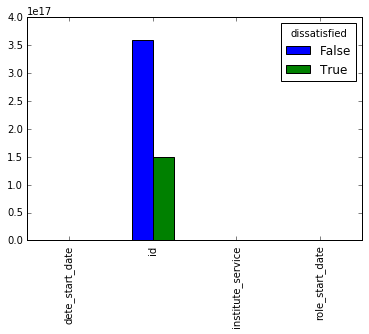

In [686]:
dissat_pt = pd.pivot_table(combined_updated,columns='dissatisfied')
dissat_pt.plot(kind='bar')

In [687]:
dissatisfied_true = combined_updated[combined_updated['dissatisfied'] == True]
dissatisfied_false = combined_updated[combined_updated['dissatisfied'] == False]

In [688]:
employees_dissatisfied = dissatisfied_true['service_cat']
employess_not_dissatisfied = dissatisfied_false['service_cat']
employees_dissatisfied.value_counts().sum()

490

In [689]:
employess_not_dissatisfied.value_counts().sum()

1033

In [690]:
employees_dissatisfied.value_counts()

New            257
Veteran        138
Experienced     75
Established     20
Name: service_cat, dtype: int64

In [691]:
employess_not_dissatisfied.value_counts()

New            721
Veteran        196
Experienced    102
Established     14
Name: service_cat, dtype: int64

Looks like more turnover is with 'New' employees with less than 3 years with companies. This could be expected as they are more likely to look for new jobs than older employees.
